The user would like to know how many apps are in: 

 

    Entertainment

    Social 

    Productivity

The user would also like to know how many of the apps in each category are free or paid. 

They would also like to know which app in each category is the highest priced and which app is the lowest price. 

List out which apps are the highest priced and what their price is and the lowest price can be a number range such as 1-50.

 

Create data visualizations of your choice that best represents the data and write a report of your findings. 

In [1]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read the csv file

data = pd.read_csv('googleplaystoremaster.csv')

In [3]:
# view first few rows of data

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [65]:
# drop unwanted/needed columns

data = data.drop(['Rating', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

In [62]:
# finding the highest priced app

data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [50]:
# remove $ from price column

data['Price'] = data['Price'].str.replace('\$', '', regex=True)

In [52]:
# remove 'Everyone' from price column

data = data[data.Price != 'Everyone']

In [61]:
# convert to numeric

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

In [25]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [9]:
# check category naming

data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
# remove the nan from Content Rating

data = data.dropna(subset=['Category'])

In [66]:
# find # of Entertainment 

data.loc[data.Category == 'ENTERTAINMENT'].count()

App         149
Category    149
Type        149
Price       149
dtype: int64

Entertainment = 149

In [67]:
# find # of Social

data.loc[data.Category == 'SOCIAL'].count()

App         295
Category    295
Type        295
Price       295
dtype: int64

Social = 295

In [68]:
# find # of Productivity

data.loc[data.Category == 'PRODUCTIVITY'].count()

App         424
Category    424
Type        424
Price       424
dtype: int64

Productivity = 424

In [69]:
# Entertainment Free vs. Paid

entData = data.loc[data['Category'] == 'ENTERTAINMENT']
entData.head()

,App,Category,Type,Price
855,Netflix,ENTERTAINMENT,Free,0.0
856,Complete Spanish Movies,ENTERTAINMENT,Free,0.0
857,Pluto TV - It’s Free TV,ENTERTAINMENT,Free,0.0
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,Free,0.0
859,YouTube Kids,ENTERTAINMENT,Free,0.0


In [70]:
entData.loc[entData['Type'] == 'Free']

,App,Category,Type,Price
855,Netflix,ENTERTAINMENT,Free,0.0
856,Complete Spanish Movies,ENTERTAINMENT,Free,0.0
857,Pluto TV - It’s Free TV,ENTERTAINMENT,Free,0.0
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,Free,0.0
859,YouTube Kids,ENTERTAINMENT,Free,0.0
...,...,...,...,...
998,LOL Pics (Funny Pictures),ENTERTAINMENT,Free,0.0
999,Meme Creator,ENTERTAINMENT,Free,0.0
1000,"Imgur: Find funny GIFs, memes & watch viral vi...",ENTERTAINMENT,Free,0.0
1002,SketchBook - draw and paint,ENTERTAINMENT,Free,0.0


In [71]:
entData.loc[entData['Type'] == 'Paid']

,App,Category,Type,Price
995,My Talking Pet,ENTERTAINMENT,Paid,4.99
1001,Meme Generator,ENTERTAINMENT,Paid,2.99


Entertainment 
Free = 147
Paid = 2

In [72]:
# Social Free vs. Paid

socData = data.loc[data['Category'] == 'SOCIAL']
socData.head()

,App,Category,Type,Price
2544,Facebook,SOCIAL,Free,0.0
2545,Instagram,SOCIAL,Free,0.0
2546,Facebook Lite,SOCIAL,Free,0.0
2547,"Messages, Text and Video Chat for Messenger",SOCIAL,Free,0.0
2548,Tumblr,SOCIAL,Free,0.0


In [32]:
#free social 

socData.loc[socData['Type'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2546,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,"500,000,000+",Free,0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
2547,"Messages, Text and Video Chat for Messenger",SOCIAL,4.4,49173,4.0M,"10,000,000+",Free,0,Everyone,Social,"June 4, 2018",1.24,4.1 and up
2548,Tumblr,SOCIAL,4.4,2955326,Varies with device,"100,000,000+",Free,0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,7.2M,"5,000,000+",Free,0,Mature 17+,Social,"May 7, 2016",3.22,4.1 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10799,Fr Daoud Lamei,SOCIAL,4.7,2036,6.8M,"100,000+",Free,0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up


In [73]:
# Paid 

socData.loc[socData['Type'] == 'Paid']

,App,Category,Type,Price
4721,W-History Standalone,SOCIAL,Paid,0.99
4971,WhatsFake Pro (Ad free),SOCIAL,Paid,0.99
5307,Ak Parti Yardım Toplama,SOCIAL,Paid,13.99


Social

Free = 292
Paid = 3

In [74]:
# Productivity

prodData = data.loc[data['Category'] == 'PRODUCTIVITY']
prodData.head()

,App,Category,Type,Price
3450,Microsoft Word,PRODUCTIVITY,Free,0.0
3451,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,Free,0.0
3452,Adobe Acrobat Reader,PRODUCTIVITY,Free,0.0
3453,"AVG Cleaner – Speed, Battery & Memory Booster",PRODUCTIVITY,Free,0.0
3454,Google Drive,PRODUCTIVITY,Free,0.0


In [75]:
# Productivity free

prodData.loc[prodData['Type'] == 'Free'].count()

App         396
Category    396
Type        396
Price       396
dtype: int64

In [76]:
# Productivity Paid

prodData.loc[prodData['Type'] == 'Paid'].count()

App         28
Category    28
Type        28
Price       28
dtype: int64

Productivity

Free = 396
Paid = 28

In [82]:
# get all three columns together for visuals

visualize = data.loc[((data['Category'] =='ENTERTAINMENT') | (data['Category'] == 'SOCIAL') | (data['Category'] == 'PRODUCTIVITY'))]

<Axes: xlabel='Category', ylabel='Count'>

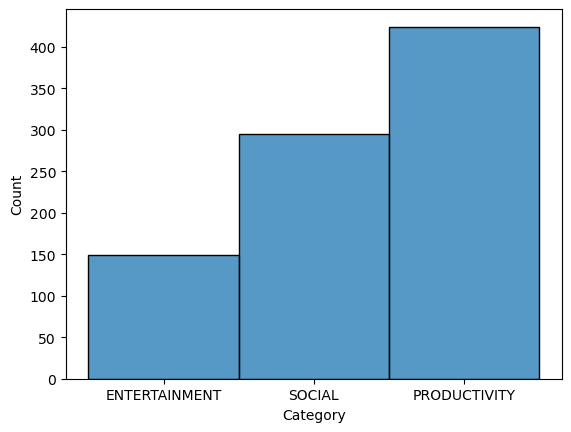

In [83]:
# Apps by Category

sns.histplot(data=visualize, x ='Category')

In [88]:
# Finding Highest Price Productivity

prodData.loc[prodData['Type'] == 'Paid'].max()

App               myGrow
Category    PRODUCTIVITY
Type                Paid
Price             154.99
dtype: object

In [87]:
# Lowest Price Productivity

prodData.loc[prodData['Type'] == 'Paid'].min()

App         ACCDB MDB DB Manager Pro - Editor for MS Access
Category                                       PRODUCTIVITY
Type                                                   Paid
Price                                                  0.99
dtype: object

In [89]:
# Highest Price Social

socData.loc[socData['Type'] == 'Paid'].max()

App         WhatsFake Pro (Ad free)
Category                     SOCIAL
Type                           Paid
Price                         13.99
dtype: object

In [90]:
# Lowest Price Social

socData.loc[socData['Type'] == 'Paid'].min()

App         Ak Parti Yardım Toplama
Category                     SOCIAL
Type                           Paid
Price                          0.99
dtype: object

In [91]:
# Highest Price Entertainment

entData.loc[entData['Type'] == 'Paid'].max()

App         My Talking Pet
Category     ENTERTAINMENT
Type                  Paid
Price                 4.99
dtype: object

In [92]:
#Lowest Price Entertainment

entData.loc[entData['Type'] == 'Paid'].min()

App         Meme Generator
Category     ENTERTAINMENT
Type                  Paid
Price                 2.99
dtype: object

Highest Price App

Productivity = myGrow for $154.99
Social = WhatsFake Pro for $13.99
Entertainment = My Talking Pet for $4.99

Lowest Price App

Productivity = ACCDB MDB DB Manager Pro for $0.99
Social = Ak Parti Yardim Toplama for $0.99
Entertainment = Meme Generator for $2.99